# Final Output Notebook - Jala Abner
## this notebook contains code from Jala Abner's midterm and final contributions the UP221 course

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

import contextily as ctx

# for interactive plots
import plotly.express as px

# to import open data
from sodapy import Socrata

# to download osm data
import osmnx as ox

# import the themes
import plotly.io as pio

# import the themes
import plotly.io as pio

# list the templates available
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [2]:
pwd

'/home/jovyan/GIS-group/Group Assignments'

In [3]:
cd '/home/jovyan/GIS-group/data'

/home/jovyan/GIS-group/data


### import merged dataset: contains data on each LA neighborhood's demographics and AMI¶

In [5]:
LAneighborhood = pd.read_csv('merged/LAneighborhood_ascend.csv',
                                   dtype=
    {
        'tract':str
    })
LAneighborhood

,Unnamed: 0,tract,COMM,med_hh_income,med_hh_income_universe,Total Population,Total Hispanic/Latine Population,Total Non-Hispanic/Latine Population,"Total Non-Hispanic/Latine Population, One Race","Total White, Non-Hispanic/Latine","Total Black, Non-Hispanic/Latine","Total American Indian/American Native, Non-Hispanic/Latine","Total Asian, Non-Hispanic/Latine"
0,413,06037141700,Sherman Oaks,250001.0,1242.0,3096.0,210.0,2886.0,2701.0,2386.0,69.0,2.0,226.0
1,989,06037262100,Bel Air,250001.0,1071.0,3195.0,171.0,3024.0,2855.0,2515.0,44.0,1.0,269.0
2,994,06037262400,Mandeville Canyon,250001.0,1101.0,3242.0,215.0,3027.0,2879.0,2620.0,43.0,4.0,194.0
3,993,06037262303,Brentwood,250001.0,1063.0,3157.0,166.0,2991.0,2844.0,2587.0,49.0,0.0,196.0
4,1191,06037980019,Palisades Highlands,250001.0,37.0,128.0,26.0,102.0,90.0,80.0,5.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,1197,06037980026,Angeles National Forest,NaN,0.0,11.0,1.0,10.0,9.0,8.0,1.0,0.0,0.0
1198,1198,06037980028,Westchester,NaN,0.0,11.0,2.0,9.0,3.0,2.0,1.0,0.0,0.0
1199,1199,06037980031,San Pedro,NaN,22.0,1748.0,709.0,1039.0,1029.0,649.0,256.0,32.0,92.0
1200,1200,06037980038,Baldwin Hills,NaN,0.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0


### drop observations that have missing data

In [6]:
LAneighborhood_clean = LAneighborhood.dropna()

 ### identify top and bottom five AMI neighbohoods

In [7]:
top_bottom = pd.concat([LAneighborhood_clean.head(5), LAneighborhood_clean.tail(5)])
top_bottom

,Unnamed: 0,tract,COMM,med_hh_income,med_hh_income_universe,Total Population,Total Hispanic/Latine Population,Total Non-Hispanic/Latine Population,"Total Non-Hispanic/Latine Population, One Race","Total White, Non-Hispanic/Latine","Total Black, Non-Hispanic/Latine","Total American Indian/American Native, Non-Hispanic/Latine","Total Asian, Non-Hispanic/Latine"
0,413,06037141700,Sherman Oaks,250001.0,1242.0,3096.0,210.0,2886.0,2701.0,2386.0,69.0,2.0,226.0
1,989,06037262100,Bel Air,250001.0,1071.0,3195.0,171.0,3024.0,2855.0,2515.0,44.0,1.0,269.0
2,994,06037262400,Mandeville Canyon,250001.0,1101.0,3242.0,215.0,3027.0,2879.0,2620.0,43.0,4.0,194.0
3,993,06037262303,Brentwood,250001.0,1063.0,3157.0,166.0,2991.0,2844.0,2587.0,49.0,0.0,196.0
4,1191,06037980019,Palisades Highlands,250001.0,37.0,128.0,26.0,102.0,90.0,80.0,5.0,0.0,5.0
1179,646,06037207304,Downtown,11430.0,1698.0,2124.0,688.0,1436.0,1291.0,621.0,450.0,11.0,184.0
1180,639,06037206301,Wholesale District,11153.0,1138.0,2074.0,539.0,1535.0,1420.0,366.0,924.0,42.0,53.0
1181,834,06037224702,University Park,9722.0,714.0,3287.0,720.0,2567.0,2480.0,1125.0,159.0,1.0,1111.0
1182,640,06037206302,Wholesale District,7193.0,640.0,1375.0,431.0,944.0,882.0,288.0,491.0,22.0,66.0
1183,641,06037206303,Wholesale District,4918.0,564.0,2858.0,1019.0,1839.0,1746.0,559.0,1043.0,56.0,48.0


### isolate the top and bottom five neighborhoods

In [8]:
test = LAneighborhood_clean[LAneighborhood_clean['tract'].isin(['06037141700', '06037262100', '06037262400', '06037262303','06037980019', '06037206303', '06037207304', '06037224320', '06037242600', '06037240307', '06037206202'])].reset_index()
test

,index,Unnamed: 0,tract,COMM,med_hh_income,med_hh_income_universe,Total Population,Total Hispanic/Latine Population,Total Non-Hispanic/Latine Population,"Total Non-Hispanic/Latine Population, One Race","Total White, Non-Hispanic/Latine","Total Black, Non-Hispanic/Latine","Total American Indian/American Native, Non-Hispanic/Latine","Total Asian, Non-Hispanic/Latine"
0,0,413,06037141700,Sherman Oaks,250001.0,1242.0,3096.0,210.0,2886.0,2701.0,2386.0,69.0,2.0,226.0
1,1,989,06037262100,Bel Air,250001.0,1071.0,3195.0,171.0,3024.0,2855.0,2515.0,44.0,1.0,269.0
2,2,994,06037262400,Mandeville Canyon,250001.0,1101.0,3242.0,215.0,3027.0,2879.0,2620.0,43.0,4.0,194.0
3,3,993,06037262303,Brentwood,250001.0,1063.0,3157.0,166.0,2991.0,2844.0,2587.0,49.0,0.0,196.0
4,4,1191,06037980019,Palisades Highlands,250001.0,37.0,128.0,26.0,102.0,90.0,80.0,5.0,0.0,5.0
5,1173,980,06037242600,Watts,16662.0,1381.0,4794.0,3142.0,1652.0,1574.0,29.0,1517.0,6.0,11.0
6,1174,829,06037224320,Pico-Union,16471.0,1155.0,2962.0,2619.0,343.0,308.0,63.0,157.0,11.0,66.0
7,1177,638,06037206202,Little Tokyo,12344.0,1195.0,3035.0,776.0,2259.0,2147.0,626.0,526.0,64.0,894.0
8,1179,646,06037207304,Downtown,11430.0,1698.0,2124.0,688.0,1436.0,1291.0,621.0,450.0,11.0,184.0
9,1183,641,06037206303,Wholesale District,4918.0,564.0,2858.0,1019.0,1839.0,1746.0,559.0,1043.0,56.0,48.0


### import 'neighborhood_IncRace' dataset

In [10]:
neighborhood_IncRace = pd.read_csv('merged/neighborhood_IncRace.csv',
                                   dtype=
    {
        'tract':str
    })

### import AMI shapefile

In [12]:
tracts = gpd.read_file('raw/MedianIncome.geojson')

In [13]:
LA_ami = tracts[tracts['tract'].isin(['06037141700', '06037262100', '06037262400', '06037262303','06037980019', '06037262507', '06037194300', '06037261104', '06037139705', '0603726231', '06037194300', '06037261104', '06037139705', '06037207304','06037206301', '06037224702','06037206302', '06037206303', '06037224320', '06037265306', '06037221820', '06037206202', '06037207307']) ]
LA_ami

,tract,med_hh_income,med_hh_income_universe,ami_category,below_med_income,below_60pct_med_income,below_moderate_income,sup_dist,csa,spa,ESRI_OID,Shape__Area,Shape__Length,geometry
135,06037206202,12344.0,1195,Extremely Low Income,Yes,Yes,Yes,District 1,Los Angeles - Little Tokyo,SPA 4 - Metro,2482,4.114009e+06,9646.074276,"POLYGON ((-118.24290 34.04607, -118.24273 34.0..."
136,06037206301,11153.0,1138,Extremely Low Income,Yes,Yes,Yes,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,2483,1.467235e+06,4941.872097,"POLYGON ((-118.24901 34.04460, -118.24758 34.0..."
137,06037206302,7193.0,640,Extremely Low Income,Yes,Yes,Yes,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,2484,4.836532e+05,3603.263688,"POLYGON ((-118.24740 34.04114, -118.24617 34.0..."
138,06037206303,4918.0,564,Extremely Low Income,Yes,Yes,Yes,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,2485,4.692073e+06,10612.528556,"POLYGON ((-118.24525 34.04226, -118.24390 34.0..."
143,06037207304,11430.0,1698,Extremely Low Income,Yes,Yes,Yes,District 1,Los Angeles - Downtown,SPA 4 - Metro,2490,5.414463e+05,3459.976863,"POLYGON ((-118.25338 34.04522, -118.25204 34.0..."
146,06037207307,12283.0,1142,Extremely Low Income,Yes,Yes,Yes,District 1,Los Angeles - Downtown,SPA 4 - Metro,2493,5.271600e+05,2910.616691,"POLYGON ((-118.24964 34.04739, -118.24855 34.0..."
624,06037221820,13630.0,957,Extremely Low Income,Yes,Yes,Yes,District 2,Los Angeles - University Park,SPA 6 - South,2971,2.200174e+06,5840.162706,"POLYGON ((-118.28883 34.03277, -118.28743 34.0..."
766,06037224320,16471.0,1155,Extremely Low Income,Yes,Yes,Yes,District 1,Los Angeles - Pico-Union,SPA 4 - Metro,3113,3.148560e+06,8337.933606,"POLYGON ((-118.28411 34.03986, -118.28194 34.0..."
771,06037224702,9722.0,714,Extremely Low Income,Yes,Yes,Yes,District 2,Los Angeles - University Park,SPA 6 - South,3118,4.249936e+06,9717.867464,"POLYGON ((-118.28397 34.02743, -118.28176 34.0..."
1301,06037261104,217396.0,633,Above Moderate Income,No,No,No,District 3,Los Angeles - Beverly Crest,SPA 5 - West,3648,4.958028e+07,40730.726149,"POLYGON ((-118.41755 34.10790, -118.41609 34.1..."


In [14]:
LAneighborhood = gpd.read_file('raw/LA_Neighborhoods.geojson')
LAneighborhood

,OBJECTID,name,geometry
0,1,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0..."
1,2,Arleta,"POLYGON ((-118.44255 34.26412, -118.44240 34.2..."
2,3,Arlington Heights,"POLYGON ((-118.31862 34.05306, -118.31673 34.0..."
3,4,Atwater Village,"MULTIPOLYGON (((-118.27886 34.15321, -118.2788..."
4,5,Baldwin Hills/Crenshaw,"POLYGON ((-118.36102 34.02532, -118.36026 34.0..."
...,...,...,...
109,110,Wilmington,"MULTIPOLYGON (((-118.28331 33.75532, -118.2880..."
110,111,Windsor Square,"POLYGON ((-118.31404 34.06254, -118.31420 34.0..."
111,112,Winnetka,"POLYGON ((-118.56232 34.23199, -118.56232 34.2..."
112,113,Woodland Hills,"POLYGON ((-118.57240 34.18668, -118.57161 34.1..."


### import LA city boundary to prepare to clip county data

In [16]:
cityLA = gpd.read_file('raw/City_Boundary.geojson')
cityLA

,OBJECTID,CITY,geometry
0,1,IN,"POLYGON ((-118.42000 34.32917, -118.41999 34.3..."


### clip dataset so that the all observations are LA proper

In [17]:
clipped = gpd.clip(tracts, cityLA)
clipped

,tract,med_hh_income,med_hh_income_universe,ami_category,below_med_income,below_60pct_med_income,below_moderate_income,sup_dist,csa,spa,ESRI_OID,Shape__Area,Shape__Length,geometry
1816,06037276606,77143.0,1782,Low Income,Yes,No,Yes,District 2,Los Angeles - Westchester,SPA 5 - West,4163,2.360108e+06,7249.355994,"POLYGON ((-118.43936 33.95777, -118.43857 33.9..."
1815,06037276605,79750.0,1386,Low Income,Yes,No,Yes,District 2,Los Angeles - Westchester,SPA 5 - West,4162,2.509882e+06,7961.153762,"POLYGON ((-118.43531 33.95968, -118.43404 33.9..."
1818,06037276608,98000.0,1154,Above Moderate Income,No,No,No,District 2,Los Angeles - Westchester,SPA 5 - West,4165,3.821364e+06,8504.297988,"POLYGON ((-118.42847 33.95972, -118.42496 33.9..."
1824,06037278102,153654.0,1502,Above Moderate Income,No,No,No,District 2,Los Angeles - Playa Del Rey,SPA 5 - West,4171,1.624911e+07,24720.607780,"POLYGON ((-118.45131 33.96424, -118.43358 33.9..."
1814,06037276601,131905.0,1646,Above Moderate Income,No,No,No,District 2,Los Angeles - Westchester,SPA 5 - West,4161,2.414852e+07,23190.228602,"POLYGON ((-118.44502 33.96166, -118.44307 33.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,06037103300,113568.0,1259,Above Moderate Income,No,No,No,District 5,Los Angeles - Shadow Hills,SPA 2 - San Fernando,2751,6.602468e+07,37007.098021,"POLYGON ((-118.37121 34.26033, -118.36930 34.2..."
2092,06037980021,NaN,14,None,None,None,None,District 5,Los Angeles - Lakeview Terrace,SPA 2 - San Fernando,4439,7.508840e+07,50381.103471,"POLYGON ((-118.40042 34.27136, -118.39772 34.2..."
539,06037104124,71000.0,1282,Low Income,Yes,No,Yes,District 5,Unincorporated - Kagel/Lopez Canyons,SPA 2 - San Fernando,2886,4.795336e+07,37473.814135,"MULTIPOLYGON (((-118.38569 34.28210, -118.3829..."
563,06037106113,99952.0,973,Above Moderate Income,No,No,No,District 3,Los Angeles - Sylmar,SPA 2 - San Fernando,2910,1.556154e+07,19777.673775,"POLYGON ((-118.42783 34.31545, -118.42434 34.3..."


### set the CRS

In [20]:
clipped.set_crs('epsg:4326')

,tract,med_hh_income,med_hh_income_universe,ami_category,below_med_income,below_60pct_med_income,below_moderate_income,sup_dist,csa,spa,ESRI_OID,Shape__Area,Shape__Length,geometry
1816,06037276606,77143.0,1782,Low Income,Yes,No,Yes,District 2,Los Angeles - Westchester,SPA 5 - West,4163,2.360108e+06,7249.355994,"POLYGON ((-118.43936 33.95777, -118.43857 33.9..."
1815,06037276605,79750.0,1386,Low Income,Yes,No,Yes,District 2,Los Angeles - Westchester,SPA 5 - West,4162,2.509882e+06,7961.153762,"POLYGON ((-118.43531 33.95968, -118.43404 33.9..."
1818,06037276608,98000.0,1154,Above Moderate Income,No,No,No,District 2,Los Angeles - Westchester,SPA 5 - West,4165,3.821364e+06,8504.297988,"POLYGON ((-118.42847 33.95972, -118.42496 33.9..."
1824,06037278102,153654.0,1502,Above Moderate Income,No,No,No,District 2,Los Angeles - Playa Del Rey,SPA 5 - West,4171,1.624911e+07,24720.607780,"POLYGON ((-118.45131 33.96424, -118.43358 33.9..."
1814,06037276601,131905.0,1646,Above Moderate Income,No,No,No,District 2,Los Angeles - Westchester,SPA 5 - West,4161,2.414852e+07,23190.228602,"POLYGON ((-118.44502 33.96166, -118.44307 33.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,06037103300,113568.0,1259,Above Moderate Income,No,No,No,District 5,Los Angeles - Shadow Hills,SPA 2 - San Fernando,2751,6.602468e+07,37007.098021,"POLYGON ((-118.37121 34.26033, -118.36930 34.2..."
2092,06037980021,NaN,14,None,None,None,None,District 5,Los Angeles - Lakeview Terrace,SPA 2 - San Fernando,4439,7.508840e+07,50381.103471,"POLYGON ((-118.40042 34.27136, -118.39772 34.2..."
539,06037104124,71000.0,1282,Low Income,Yes,No,Yes,District 5,Unincorporated - Kagel/Lopez Canyons,SPA 2 - San Fernando,2886,4.795336e+07,37473.814135,"MULTIPOLYGON (((-118.38569 34.28210, -118.3829..."
563,06037106113,99952.0,973,Above Moderate Income,No,No,No,District 3,Los Angeles - Sylmar,SPA 2 - San Fernando,2910,1.556154e+07,19777.673775,"POLYGON ((-118.42783 34.31545, -118.42434 34.3..."


### calculate the bounding box

In [29]:
bbox = clipped.total_bounds

# print bounding box
print("Bounding Box:")
print('min longitude:', bbox[0])
print('min latitude:', bbox[1])
print('max longitude:', bbox[2])
print('max latitude:', bbox[3])

Bounding Box:
min longitude: -118.6681741097937
min latitude: 33.70404295314168
max longitude: -118.15536986710319
max latitude: 34.33731107839654


### plot AMI classification with basemap

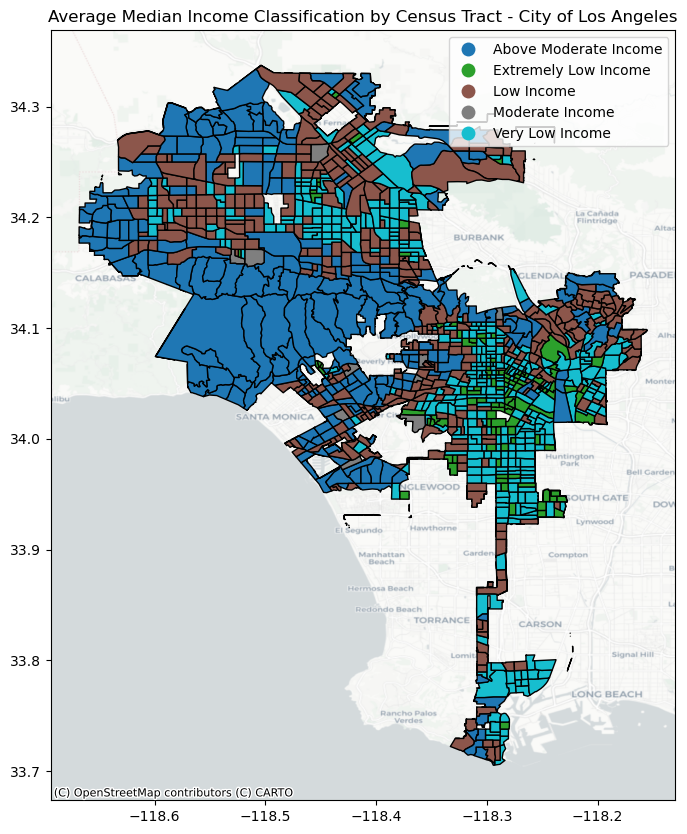

In [33]:
ax = clipped.plot(figsize=(12,10),
         column='ami_category',
                 edgecolor="black",
                 legend=True)
bounds = [-119,34,-118,35]
plt.title("Average Median Income Classification by Census Tract - City of Los Angeles")
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=4326)

<Axes: >

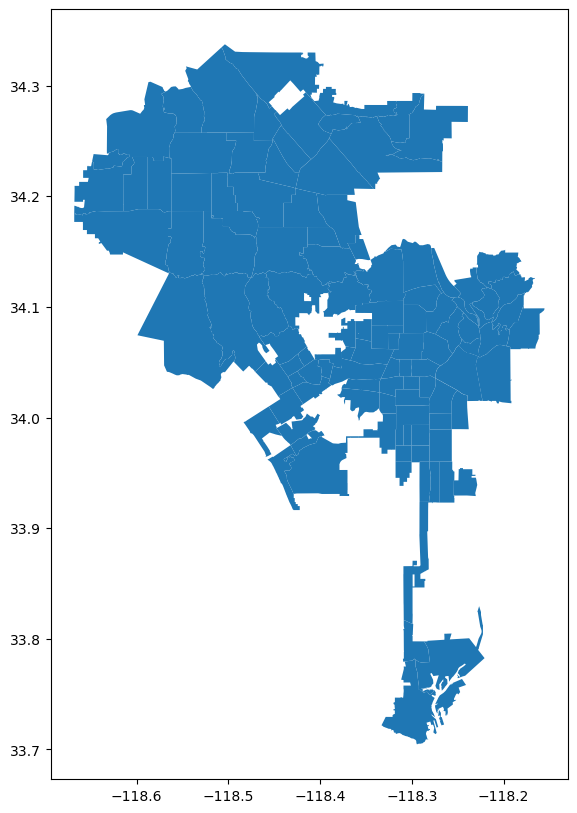

In [34]:
LAneighborhood.plot(figsize=(12,10))

In [35]:
EdComm = pd.read_csv('raw/EducCommute_LA2022.csv')
EdComm

,name,year,denom_pop_25_over,Bachelor's Degree or Higher,denom_tot_workers,Commute Time Above 30 Minutes,denom_tot_workers.1,Commute Time Above 1 Hour
0,Irwindale,2022,1095.15,19.91,795.84,44.17,795.84,12.94
1,Pico-Union,2022,25829.46,15.47,17931.97,66.67,17931.97,15.13
2,Glendora,2022,35746.70,37.30,24282.86,51.62,24282.86,16.42
3,Industry,2022,9114.76,24.16,6222.83,49.80,6222.83,14.51
4,Sylmar,2022,53069.47,19.97,37061.83,49.30,37061.83,11.24
...,...,...,...,...,...,...,...,...
253,El Segundo,2022,12627.80,61.27,9799.08,34.52,9799.08,8.28
254,View Park-Windsor Hills,2022,9423.12,60.62,5150.68,58.29,5150.68,11.09
255,Sierra Madre,2022,8729.98,64.70,5988.82,40.99,5988.82,10.40
256,Gramercy Park,2022,7640.02,23.24,4674.94,60.86,4674.94,6.28


In [9]:
EdComm.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           258 non-null    object 
 1   year                           258 non-null    int64  
 2   denom_pop_25_over              257 non-null    float64
 3   Bachelor's Degree or Higher    257 non-null    float64
 4   denom_tot_workers              257 non-null    float64
 5   Commute Time Above 30 Minutes  257 non-null    float64
 6   denom_tot_workers.1            257 non-null    float64
 7   Commute Time Above 1 Hour      257 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 16.3+ KB


In [36]:
merge = LAneighborhood.merge(EdComm, on = 'name')
merge

,OBJECTID,name,geometry,year,denom_pop_25_over,Bachelor's Degree or Higher,denom_tot_workers,Commute Time Above 30 Minutes,denom_tot_workers.1,Commute Time Above 1 Hour
0,1,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0...",2022,11309.83,18.96,8541.28,64.94,8541.28,17.15
1,2,Arleta,"POLYGON ((-118.44255 34.26412, -118.44240 34.2...",2022,22867.15,13.93,16136.83,48.66,16136.83,11.65
2,3,Arlington Heights,"POLYGON ((-118.31862 34.05306, -118.31673 34.0...",2022,14251.74,27.06,9245.51,64.20,9245.51,11.13
3,4,Atwater Village,"MULTIPOLYGON (((-118.27886 34.15321, -118.2788...",2022,9505.62,49.87,6549.05,51.33,6549.05,10.32
4,5,Baldwin Hills/Crenshaw,"POLYGON ((-118.36102 34.02532, -118.36026 34.0...",2022,24141.58,34.89,15916.36,68.17,15916.36,12.14
...,...,...,...,...,...,...,...,...,...,...
105,110,Wilmington,"MULTIPOLYGON (((-118.28331 33.75532, -118.2880...",2022,33734.81,9.86,22754.89,37.76,22754.89,8.75
106,111,Windsor Square,"POLYGON ((-118.31404 34.06254, -118.31420 34.0...",2022,4853.96,50.96,3438.54,61.14,3438.54,7.33
107,112,Winnetka,"POLYGON ((-118.56232 34.23199, -118.56232 34.2...",2022,36274.28,29.74,26117.93,45.84,26117.93,14.81
108,113,Woodland Hills,"POLYGON ((-118.57240 34.18668, -118.57161 34.1...",2022,53093.62,55.59,35841.69,52.73,35841.69,19.12


In [37]:
merge_ascend = merge.sort_values(by="Bachelor's Degree or Higher", ascending = False)
pd.concat([merge_ascend.head(10), merge_ascend.tail(10)])

,OBJECTID,name,geometry,year,denom_pop_25_over,Bachelor's Degree or Higher,denom_tot_workers,Commute Time Above 30 Minutes,denom_tot_workers.1,Commute Time Above 1 Hour
10,11,Brentwood,"POLYGON ((-118.49014 34.13096, -118.49009 34.1...",2022,24890.31,80.62,17850.09,35.71,17850.09,7.05
72,76,Playa Vista,"POLYGON ((-118.42548 33.96564, -118.42613 33.9...",2022,11538.37,78.73,8567.63,47.35,8567.63,12.22
65,69,Pacific Palisades,"POLYGON ((-118.55703 34.12653, -118.55669 34.1...",2022,15982.38,77.92,9823.14,40.96,9823.14,3.75
103,108,West Los Angeles,"POLYGON ((-118.43421 34.03741, -118.43516 34.0...",2022,10104.77,77.26,7720.93,33.80,7720.93,3.70
18,20,Cheviot Hills,"POLYGON ((-118.39888 34.04426, -118.39879 34.0...",2022,5849.71,75.41,3845.83,40.94,3845.83,4.77
104,109,Westwood,"POLYGON ((-118.42946 34.07925, -118.42938 34.0...",2022,24368.46,74.83,22031.08,25.80,22031.08,3.39
5,6,Bel-Air,"POLYGON ((-118.46165 34.13077, -118.46077 34.1...",2022,4534.17,72.91,2778.42,45.83,2778.42,9.87
8,9,Beverlywood,"POLYGON ((-118.38609 34.04675, -118.38934 34.0...",2022,4422.32,72.90,2903.67,39.91,2903.67,4.81
71,75,Playa del Rey,"POLYGON ((-118.42735 33.96756, -118.42657 33.9...",2022,9768.92,71.78,6556.96,56.82,6556.96,11.68
15,16,Century City,"POLYGON ((-118.41267 34.06073, -118.41222 34.0...",2022,4632.10,71.18,2896.71,30.99,2896.71,3.67


In [38]:
merge.to_csv('merged/LAneighborhood_EducComm.csv')

In [39]:
merge.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   OBJECTID                       110 non-null    int64   
 1   name                           110 non-null    object  
 2   geometry                       110 non-null    geometry
 3   year                           110 non-null    int64   
 4   denom_pop_25_over              110 non-null    float64 
 5   Bachelor's Degree or Higher    110 non-null    float64 
 6   denom_tot_workers              110 non-null    float64 
 7   Commute Time Above 30 Minutes  110 non-null    float64 
 8   denom_tot_workers.1            110 non-null    float64 
 9   Commute Time Above 1 Hour      110 non-null    float64 
dtypes: float64(6), geometry(1), int64(2), object(1)
memory usage: 8.7+ KB


In [40]:
merge.columns = ['OBJECTID',
                 'name',
                 'geometry',
                 'year',
                       'over25pop',
                       'Bachelors_Higher',
                       'TotalWorkingPop',
                       'CommOver30',
                       'TotalWorkingPop_1',
                       'CommOver60']

In [41]:
merge.set_crs('epsg:4326')

,OBJECTID,name,geometry,year,over25pop,Bachelors_Higher,TotalWorkingPop,CommOver30,TotalWorkingPop_1,CommOver60
0,1,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0...",2022,11309.83,18.96,8541.28,64.94,8541.28,17.15
1,2,Arleta,"POLYGON ((-118.44255 34.26412, -118.44240 34.2...",2022,22867.15,13.93,16136.83,48.66,16136.83,11.65
2,3,Arlington Heights,"POLYGON ((-118.31862 34.05306, -118.31673 34.0...",2022,14251.74,27.06,9245.51,64.20,9245.51,11.13
3,4,Atwater Village,"MULTIPOLYGON (((-118.27886 34.15321, -118.2788...",2022,9505.62,49.87,6549.05,51.33,6549.05,10.32
4,5,Baldwin Hills/Crenshaw,"POLYGON ((-118.36102 34.02532, -118.36026 34.0...",2022,24141.58,34.89,15916.36,68.17,15916.36,12.14
...,...,...,...,...,...,...,...,...,...,...
105,110,Wilmington,"MULTIPOLYGON (((-118.28331 33.75532, -118.2880...",2022,33734.81,9.86,22754.89,37.76,22754.89,8.75
106,111,Windsor Square,"POLYGON ((-118.31404 34.06254, -118.31420 34.0...",2022,4853.96,50.96,3438.54,61.14,3438.54,7.33
107,112,Winnetka,"POLYGON ((-118.56232 34.23199, -118.56232 34.2...",2022,36274.28,29.74,26117.93,45.84,26117.93,14.81
108,113,Woodland Hills,"POLYGON ((-118.57240 34.18668, -118.57161 34.1...",2022,53093.62,55.59,35841.69,52.73,35841.69,19.12


In [42]:
bbox = merge.total_bounds

# print bounding box
print("Bounding Box:")
print('min longitude:', bbox[0])
print('min latitude:', bbox[1])
print('max longitude:', bbox[2])
print('max latitude:', bbox[3])

Bounding Box:
min longitude: -118.668117720454
min latitude: 33.70467436671
max longitude: -118.155370349007
max latitude: 34.3373108721271


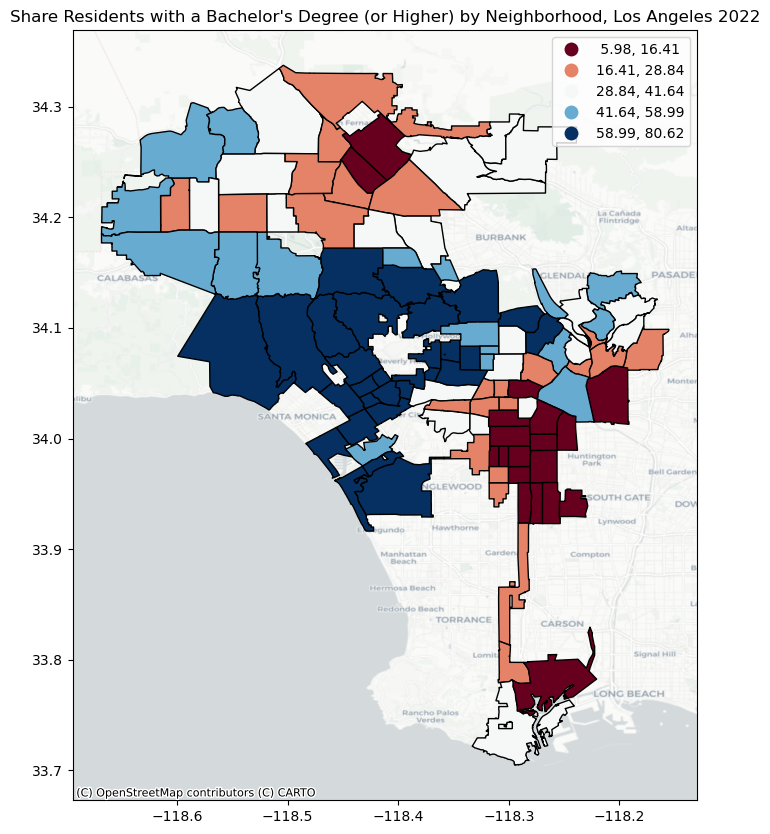

In [43]:
ax = merge.plot(figsize=(12,10),
                column='Bachelors_Higher',
                cmap="RdBu",
                edgecolor="black",
                legend=True, 
                scheme='NaturalBreaks')
bounds = [-119,34,-118,35]
plt.title("Share Residents with a Bachelor's Degree (or Higher) by Neighborhood, Los Angeles 2022")
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=4326)

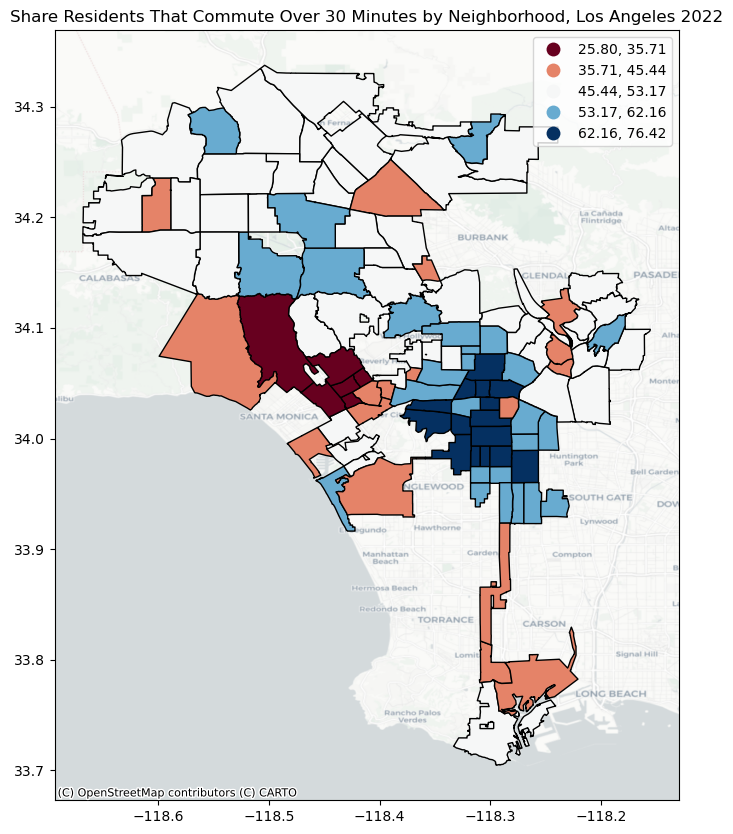

In [44]:
ax = merge.plot(figsize=(12,10),
                column='CommOver30',
                cmap="RdBu",
                edgecolor="black",
                legend=True, 
                scheme='NaturalBreaks')
bounds = [-119,34,-118,35]
plt.title("Share Residents That Commute Over 30 Minutes by Neighborhood, Los Angeles 2022")
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=4326)

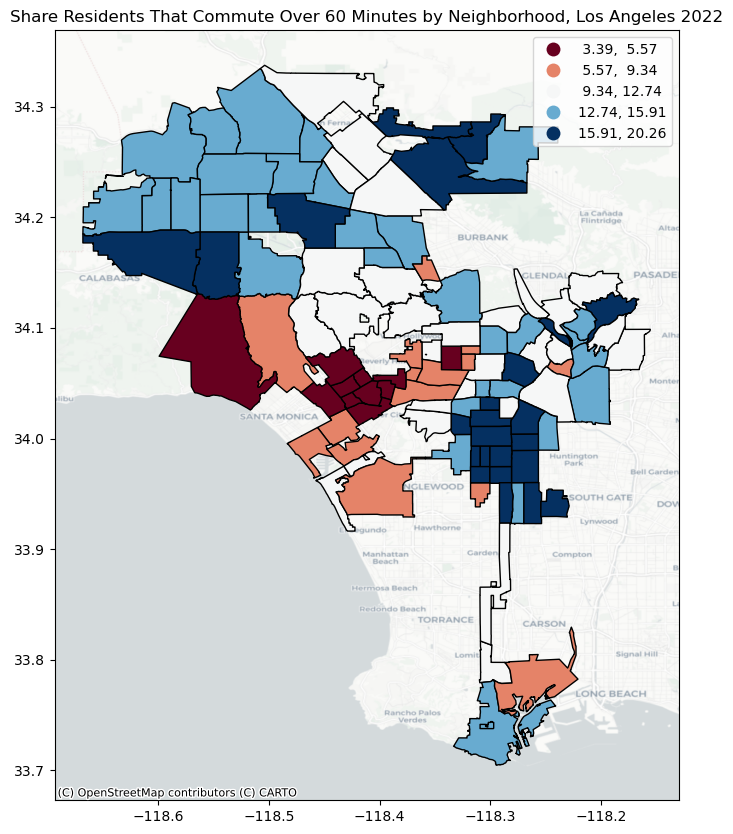

In [45]:
ax = merge.plot(figsize=(12,10),
                column='CommOver60',
                cmap="RdBu",
                edgecolor="black",
                legend=True, 
                scheme='NaturalBreaks')
bounds = [-119,34,-118,35]
plt.title("Share Residents That Commute Over 60 Minutes by Neighborhood, Los Angeles 2022")
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=4326)

## Highest vs. Lowest Educational Attainment Neighborhoods
### Lowest Educational Attainment: Watts
1. Population: 40,918; 76.05% Hispanic/Latino; 20.63% Black
2. Vehicle Ownership: 18.64%
3. Bachelors Degree or Higher: 5.98%
4. Unemployment Rate: 14.53%
5. Median HH Income: $46,305
6. Below 100% FPL: 28.19%
7. Below 200: FPL: 61.39%
8. Share of Residents that Commute Over an Hour: 17.84%

### Highest Educational Attainment: Pacific Palisades
1. Population: 22,883; 80.02% White; 7.79% Asian
2. Vehicle Ownership: 2.65%
3. Bachelors Degree or Higher: 77.92%
4. Unemployment Rate: 3.66%
5. Median HH Income: $205,520
6. Below 100% FPL: 5.04%
7. Below 200: FPL: 9.62%
8. Share of Residents that Commute Over an Hour: 3.75%

In [50]:
address = 'Watts, Los Angeles, California, United States'

In [51]:
%%time
# %%time is a magic command to see how long it takes this cell to run 

# get the data from OSM that are tagged as 'building' for a 1000m X 1000m square area
osm = ox.features.features_from_address(address,tags={'building':True},dist=200)

CPU times: user 184 ms, sys: 4.12 ms, total: 188 ms
Wall time: 4.61 s


In [52]:
osm.shape

(193, 16)

In [53]:
type(osm)

geopandas.geodataframe.GeoDataFrame

In [54]:
osm.sample(30)

nodes  \
element_type osmid                                                          
way          412245419  [4137339064, 4137339063, 4137339069, 413733907...   
             412217783  [4137239015, 4137239028, 4137239029, 413723902...   
             412218161  [4137236932, 4137236931, 4137236891, 413723689...   
             412217900  [4137238877, 4137238997, 4137238996, 413723887...   
             412245441  [4137338928, 4137338914, 4137338915, 413733888...   
             412218458  [4137236845, 4137236843, 4137236560, 413723656...   
             412245568  [4137338988, 4137339001, 4137339018, 413733901...   
             412218572  [4137236547, 4137236548, 4137236872, 413723687...   
             412218048  [4137237837, 4137237839, 4137238100, 413723809...   
             412218209  [4137239006, 4137239009, 4137239039, 413723903...   
             412245399  [4137338623, 4137338612, 4137338613, 413733860...   
             412245422  [4137338975, 4137338972, 4137338974, 413733897...   
             412218450  [4137235902, 4137235903, 4137235761, 413723576...   
             412218010  [4137237007, 4137237008, 4137237290, 413723728...   
             412217574  [4137238808, 4137238661, 4137238662, 413723863...   
             412218031  [4137238797, 4137238841, 4137238669, 413723864...   
             412245591  [4137338712, 4137338733, 4137338758, 413733873...   
             412218189  [4137238595, 4137238598, 4137238613, 413723861...   
             412245513  [4137338702, 4137338681, 4137338683, 413733870...   
             412245468  [4137338607, 4137338621, 4137338620, 413733860...   
             412245529  [4137338587, 4137338595, 4137338592, 413733858...   
             412218426  [4137237847, 4137237848, 4137238370, 413723836...   
             412217672  [4137239122, 4137239151, 4137239152, 413723918...   
             412217620  [4137237429, 4137237426, 4137237409, 413723740...   
             412218501  [4137239123, 4137239157, 4137239158, 413723917...   
             412245498  [4137338667, 4137338661, 4137338662, 413733866...   
             412218394  [4137238684, 4137238813, 4137238810, 413723882...   
             412218542  [4137239165, 4137239114, 4137239116, 413723912...   
             412218220  [4137235889, 4137235890, 4137235941, 413723593...   
             412218113  [4137235613, 4137235477, 4137235606, 413723561...   

                       amenity    building building:units denomination   ele  \
element_type osmid                                                             
way          412245419     NaN  apartments             60          NaN  40.9   
             412217783     NaN       house              1          NaN  36.7   
             412218161     NaN       house              1          NaN  34.4   
             412217900     NaN       house              1          NaN  36.8   
             412245441     NaN         yes            NaN          NaN  36.1   
             412218458     NaN       house              1          NaN  37.2   
             412245568     NaN       house              1          NaN  37.3   
             412218572     NaN       house              1          NaN  35.9   
             412218048     NaN       house              1          NaN  34.8   
             412218209     NaN       house              1          NaN  35.6   
             412245399     NaN         yes            NaN          NaN  36.7   
             412245422     NaN  apartments             60          NaN  39.8   
             412218450     NaN       house              1          NaN  35.0   
             412218010     NaN       house              1          NaN  35.5   
             412217574     NaN       house              1          NaN  36.5   
             412218031     NaN       house              1          NaN  37.2   
             412245591     NaN         yes            NaN          NaN  37.4   
             412218189     NaN  commercial              1          NaN  36.4   
   

In [55]:
osm.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 193 entries, ('way', 351589835) to ('relation', 6157472)
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   nodes            193 non-null    object  
 1   amenity          2 non-null      object  
 2   building         193 non-null    object  
 3   building:units   138 non-null    object  
 4   denomination     1 non-null      object  
 5   ele              189 non-null    object  
 6   height           189 non-null    object  
 7   lacounty:ain     189 non-null    object  
 8   lacounty:bld_id  189 non-null    object  
 9   name             1 non-null      object  
 10  religion         1 non-null      object  
 11  start_date       139 non-null    object  
 12  geometry         193 non-null    geometry
 13  shelter_type     1 non-null      object  
 14  ways             1 non-null      object  
 15  type             1 non-null      object  
dtypes

In [56]:
## subset it
columns_to_keep = ['nodes', 'amenity','geometry','building','building:units', 'ele', 'height', 'name', 'religion', 'start_date']
osm = osm[columns_to_keep]
osm.head(10)

nodes  \
element_type osmid                                                          
way          351589835  [3573974631, 4137236879, 4137236878, 413723685...   
             412217420  [4137237056, 4137237093, 4137237092, 413723706...   
             412217437  [4137237434, 4137237394, 4137237395, 413723735...   
             412217462  [4137237768, 4137237718, 4137237720, 413723770...   
             412217468  [4137237030, 4137237031, 4137236981, 413723698...   
             412217475  [4137236549, 4137236550, 4137236571, 413723657...   
             412217507  [4137238134, 4137238135, 4137238177, 413723817...   
             412217574  [4137238808, 4137238661, 4137238662, 413723863...   
             412217582  [4137239125, 4137239127, 4137239132, 413723913...   
             412217604  [4137238989, 4137238888, 4137238866, 413723886...   

                                 amenity  \
element_type osmid                         
way          351589835  place_of_worship   
             412217420               NaN   
             412217437               NaN   
             412217462               NaN   
             412217468               NaN   
             412217475               NaN   
             412217507               NaN   
             412217574               NaN   
             412217582               NaN   
             412217604               NaN   

                                                                 geometry  \
element_type osmid                                                          
way          351589835  POLYGON ((-118.24228 33.94026, -118.24229 33.9...   
             412217420  POLYGON ((-118.24185 33.94041, -118.24185 33.9...   
             412217437  POLYGON ((-118.24096 33.94093, -118.24096 33.9...   
             412217462  POLYGON ((-118.24218 33.94108, -118.24218 33.9...   
             412217468  POLYGON ((-118.24112 33.94038, -118.24112 33.9...   
             412217475  POLYGON ((-118.24097 33.93996, -118.24102 33.9...   
             412217507  POLYGON ((-118.24203 33.94127, -118.24209 33.9...   
             412217574  POLYGON ((-118.24061 33.94180, -118.24061 33.9...   
             412217582  POLYGON ((-118.24175 33.94214, -118.24183 33.9...   
             412217604  POLYGON ((-118.24096 33.94195, -118.24086 33.9...   

                       building building:units   ele height  \
element_type osmid                                            
way          351589835      yes              1  52.0   20.0   
             412217420    house              1  34.6    3.5   
             412217437    house              1  36.4    4.3   
             412217462    house              1  36.6    3.8   
             412217468    house              1  36.4    4.4   
             412217475    house              1  36.5    4.6   
             412217507    house              1  36.6    3.9   
             412217574    house              1  36.5    4.2   
             412217582    house              1  36.9    4.3   
             412217604    house              1  38.1    5.4   

                                             name   religion start_date  
element_type osmid                                                       
way          351589835  St Johns United Methodist  christian       1930  
             412217420                        NaN        NaN       1992  
             412217437                        NaN        NaN       1932  
             412217462                        NaN        NaN       1924  
             412217468                        NaN        NaN       2002  
             412217475                        NaN        NaN       1938  
             412217507                        NaN        NaN       1925  
             412217574                        NaN        NaN       1974  
             412217582                        NaN        NaN       1974  
             412217604                        NaN        NaN       1974

In [57]:
# locate cells in column building where value is yes
osm.loc[osm['building']=='yes','building'] = 'unspecified'
osm.loc[osm['building']=='hotel','building'] = 'commercial'

In [58]:
# get the counts of buildings by building type
osm_building_counts = osm.value_counts(['building']).reset_index(name="count")
osm_building_counts 

,building,count
0,house,119
1,unspecified,56
2,residential,9
3,apartments,7
4,commercial,2


In [59]:
# set default template to plotly_white
pio.templates.default = "plotly_white"

<Axes: >

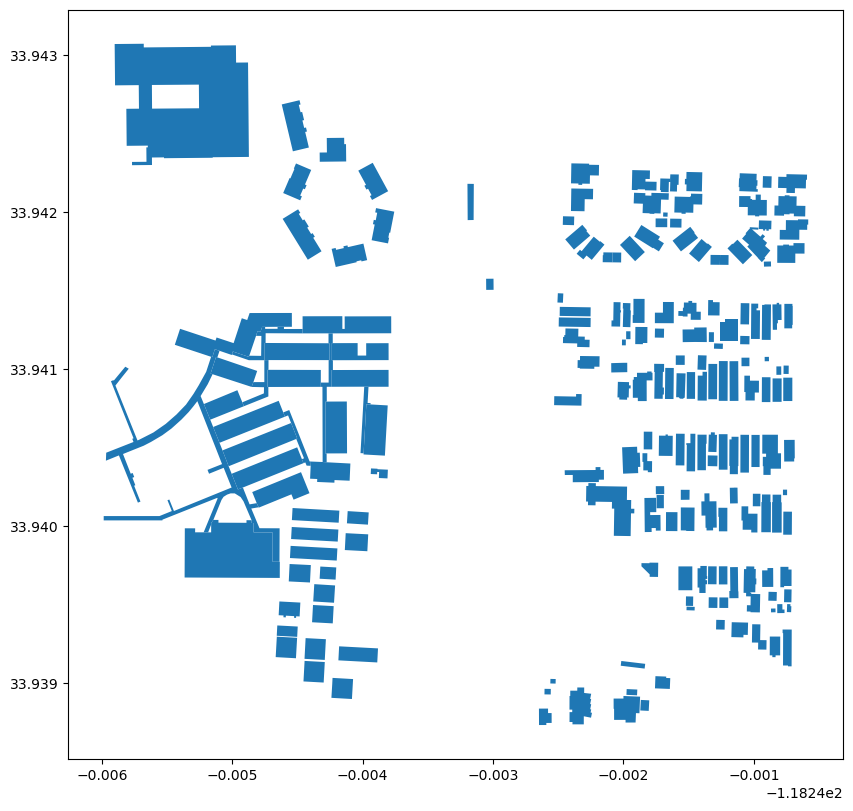

In [60]:
# plot entire dataset
osm.plot(figsize=(10,10))

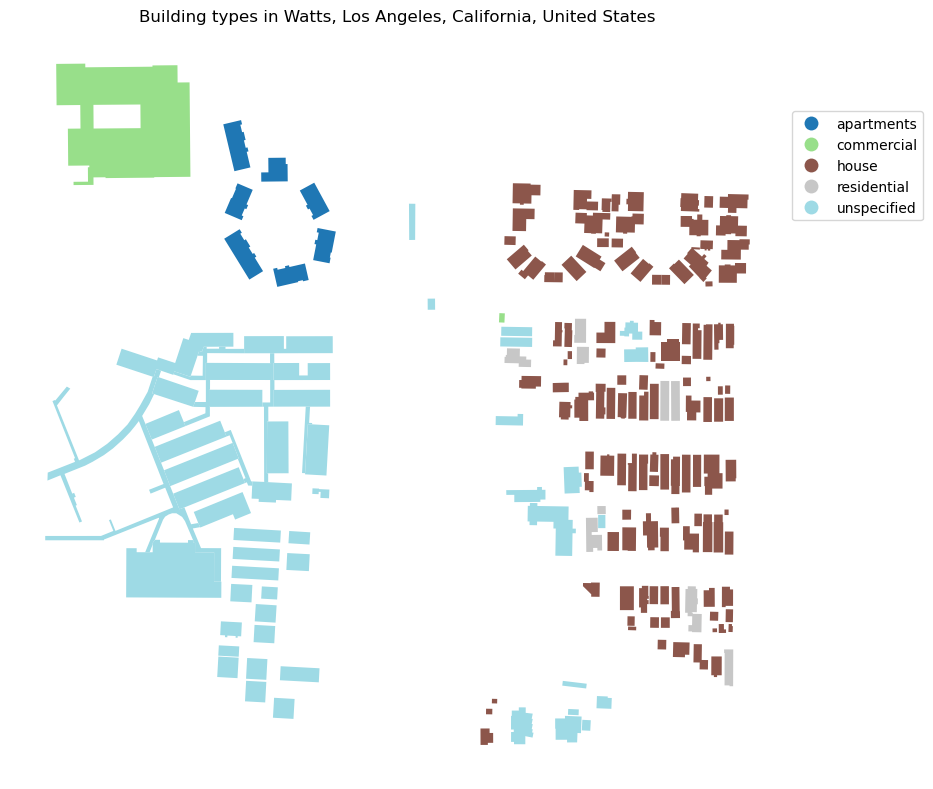

In [61]:
fig, ax = plt.subplots(figsize=(10,10))

# create the map plot
osm.plot(ax=ax,
         column='building',
         cmap='tab20',
         legend=True,
         legend_kwds={'loc':'upper left','bbox_to_anchor':(1,.9)})

# add a title
ax.set_title('Building types in ' + address)

# get rid of the axis
ax.axis('off');

In [62]:
address2 = 'Pacific Palisades, Los Angeles, California, United States'

In [63]:
%%time
# %%time is a magic command to see how long it takes this cell to run 

# get the data from OSM that are tagged as 'building' for a 1000m X 1000m square area
osm2 = ox.features.features_from_address(address2,tags={'building':True},dist=200)

CPU times: user 122 ms, sys: 12 ms, total: 134 ms
Wall time: 151 ms


In [64]:
osm2.shape

(156, 23)

In [65]:
type(osm2)

geopandas.geodataframe.GeoDataFrame

In [66]:
osm2.sample(30)

amenity       parking  \
element_type osmid                               
way          420493711       NaN           NaN   
             420493837       NaN           NaN   
             420502338       NaN           NaN   
             420493811       NaN           NaN   
             420502480       NaN           NaN   
             420493298       NaN           NaN   
             1215652525      NaN           NaN   
             420493574       NaN           NaN   
             422296428       NaN           NaN   
             420494227       NaN           NaN   
             422296943       NaN           NaN   
             420493578       NaN           NaN   
             420493588       NaN           NaN   
             420502893       NaN           NaN   
             422297221       NaN           NaN   
relation     6278370         NaN           NaN   
way          420502614       NaN           NaN   
             1215652528      NaN           NaN   
             421933621       NaN           NaN   
             422297248       NaN           NaN   
             294889344   parking  multi-storey   
             422296852       NaN           NaN   
             420509332       NaN           NaN   
             420493663       NaN           NaN   
             1215652526      NaN           NaN   
relation     6250253         NaN           NaN   
             6278365         NaN           NaN   
way          420494104       NaN           NaN   
             420493820       NaN           NaN   
             420502135       NaN           NaN   

                                                                  geometry  \
element_type osmid                                                           
way          420493711   POLYGON ((-118.52619 34.04897, -118.52616 34.0...   
             420493837   POLYGON ((-118.52540 34.04973, -118.52533 34.0...   
             420502338   POLYGON ((-118.52462 34.04975, -118.52455 34.0...   
             420493811   POLYGON ((-118.52611 34.04985, -118.52608 34.0...   
             420502480   POLYGON ((-118.52724 34.04908, -118.52723 34.0...   
             420493298   POLYGON ((-118.52502 34.04938, -118.52501 34.0...   
             1215652525  POLYGON ((-118.52487 34.04842, -118.52489 34.0...   
             420493574   POLYGON ((-118.52453 34.04651, -118.52430 34.0...   
             422296428   POLYGON ((-118.52831 34.04819, -118.52828 34.0...   
             420494227   POLYGON ((-118.52426 34.04824, -118.52428 34.0...   
             422296943   POLYGON ((-118.52879 34.04856, -118.52899 34.0...   
             420493578   POLYGON ((-118.52656 34.04815, -118.52660 34.0...   
             420493588   POLYGON ((-118.52621 34.04899, -118.52621 34.0...   
             420502893   POLYGON ((-118.52705 34.04950, -118.52704 34.0...   
             422297221   POLYGON ((-118.52782 34.04675, -118.52771 34.0...   
relation     6278370     POLYGON ((-118.52751 34.04685, -118.52753 34.0...   
way          420502614   POLYGON ((-118.52773 34.04964, -118.52773 34.0...   
             1215652528  POLYGON ((-118.52490 34.04782, -118.52488 34.0...   
             421933621   POLYGON ((-118.52567 34.04665, -118.52566 34.0...   
             422297248   POLYGON ((-118.52874 34.04793, -118.52873 34.0...   
             294889344   POLYGON ((-118.52541 34.04612, -118.52541 34.0...   
             422296852   POLYGON ((-118.52845 34.04709, -118.52844 34.0...   
             420509332   POLYGON ((-118.52456 34.04953, -118.52457 34.0...   
             420493663   POLYGON ((-118.52524 34.04890, -118.52523 34.0...   
             1215652526  POLYGON ((-118.52491 34.04757, -118.52505 34.0...   
relation     6250253     POLYGON ((-118.52704 34.04858, -118.52706 34.0...   
             6278365     POLYGON ((-118.52848 34.04636, -118.52849 34.0...   
way          420494104   POLYGON ((-118.52432 34.04839, -118.52432 34.0...   
             420493820   POLYGON ((-118.52537 34.04914, -118.52538 34.0...   
      

In [67]:
# locate cells in column building where value is yes
osm2.loc[osm2['building']=='yes','building'] = 'unspecified'
osm2.loc[osm2['building']=='roof','building'] = 'unspecified'

In [68]:
# get the counts of buildings by building type
osm2_building_counts = osm2.value_counts(['building']).reset_index(name="count")
osm2_building_counts

,building,count
0,house,95
1,retail,43
2,commercial,7
3,unspecified,6
4,apartments,3
5,residential,2


In [69]:
# set default template to plotly_white
pio.templates.default = "plotly_white"

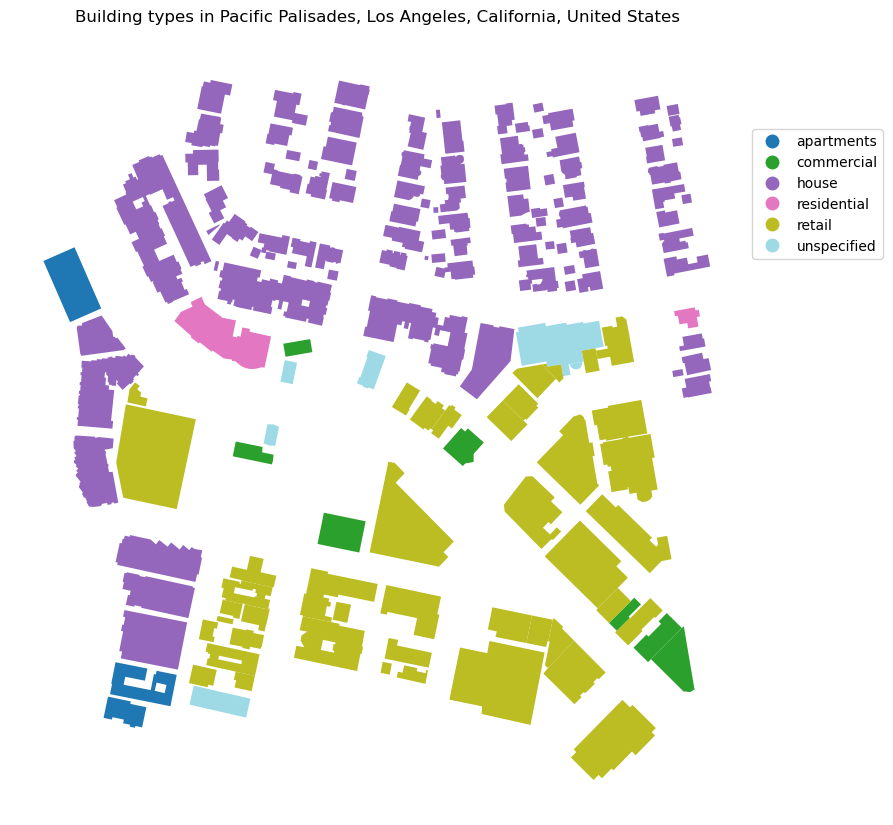

In [70]:
fig, ax = plt.subplots(figsize=(10,10))

# create the map plot
osm2.plot(ax=ax,
         column='building',
         cmap='tab20',
         legend=True,
         legend_kwds={'loc':'upper left','bbox_to_anchor':(1,.9)})

# add a title
ax.set_title('Building types in ' + address2)

# get rid of the axis
ax.axis('off');